<a href="https://colab.research.google.com/github/vinodnidoni20-blip/AIML-Project/blob/main/AIML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# core libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
import scipy.stats as statimport

##predict customer Channel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [10]:
# uploading csv in google colab
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [11]:
import pandas as pd
df= pd.read_csv("Wholesale customers data.csv")
print(df)

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...

In [12]:
# Supervised Learning: This approach uses a labeled dataset (where we know the Channel for each customer) to train a model to predict the channel for a new customer.
#The first business problem is a supervised learning (classification) task.
#Unsupervised Learning: This approach deals with unlabeled data and finds hidden patterns or groupings within the data. The second business problem (identifying hidden customer segments)
# is an unsupervised learning (clustering) task.

In [13]:
X = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']] #Features
Y = df[['Region','Channel']] #Target

In [14]:
# Total Spend
df['TotalSpend'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']
# Non grocery Spend Ratio
df['NonGrocerySpendRatio']=(df['Fresh']+df['Milk']+df['Frozen']+df['Detergents_Paper']+df['Delicassen'])/df['TotalSpend']
#Normalize Distribution
df['LogTotalSpend'] = np.log(df['TotalSpend']+1)

In [15]:
#training and Testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
# Outlier detection
# Calculate Q1, Q3, and IQR for 'Milk' to define upper and lower bounds
Q1_milk = df['Milk'].quantile(0.25)
Q3_milk = df['Milk'].quantile(0.75)
IQR_milk = Q3_milk - Q1_milk

upper_bound_milk = Q3_milk + 1.5 * IQR_milk
lower_bound_milk = Q1_milk - 1.5 * IQR_milk

df['Milk'] = np.where(df['Milk'] > upper_bound_milk, upper_bound_milk, np.where(df['Milk'] < lower_bound_milk, lower_bound_milk, df['Milk']))

# Scaling of X feature
X = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','TotalSpend','NonGrocerySpendRatio','LogTotalSpend']
scaler = StandardScaler()
df[X] = scaler.fit_transform(df[X])

In [17]:
# Add a constant for VIF calculation

X = df.drop(['TotalSpend'],axis=1)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.columns.size)]
print("\nVIF Data:")
print(vif_data)


VIF Data:
                Feature        VIF
0               Channel   9.248117
1                Region   8.640452
2                 Fresh   3.130915
3                  Milk   2.732831
4               Grocery  13.002604
5                Frozen   1.494921
6      Detergents_Paper   9.277379
7            Delicassen   1.400861
8  NonGrocerySpendRatio   2.899662
9         LogTotalSpend   5.086311


In [18]:
# Part-C  Regression Analysis

In [19]:
#Build model
X = df.drop(['TotalSpend'],axis=1)
Y = df['TotalSpend']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
#Linear Regression
s_model=LinearRegression()
s_model.fit(X_train,Y_train)

model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

#Evaluating
def evaluate_regression(Y_test, Y_pred):
    mae = mean_absolute_error(Y_test, Y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    r2 = r2_score(Y_test, Y_pred)
    return mae, rmse, r2
calculated_mae, calculated_rmse, calculated_r2 = evaluate_regression(Y_test, Y_pred)

print(f"Linear Regression MAE:{calculated_mae}, RMSE:{calculated_rmse}, R2:{calculated_r2}")

Linear Regression MAE:0.05046460387387701, RMSE:0.07547590641597873, R2:0.9938374022161697


In [22]:
#Apply Ridge Lasso

# Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge, rmse_ridge, r2_ridge = evaluate_regression(Y_test, y_pred_ridge)
print("Ridge Regression:")
print(f"MAE: {mae_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}")


#Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)
y_pred_lasso = lasso_model.predict(X_test)
mae_lasso, rmse_lasso, r2_lasso = evaluate_regression(Y_test, y_pred_lasso)
print("\nLasso Regression:")
print(f"MAE: {mae_lasso}, RMSE: {rmse_lasso}, R2: {r2_lasso}")

Ridge Regression:
MAE: 0.04956320666920833, RMSE: 0.0732963603017252, R2: 0.9941881825127666

Lasso Regression:
MAE: 0.6449358863604501, RMSE: 0.9617004350072117, R2: -0.0005223022572968805


Training Logistic Regression...
{'Accuracy': 0.9204545454545454, 'Precision': 0.9218158143939394, 'Recall': 0.9204545454545454, 'F1-Score': 0.9209924579790982, 'ROC-AUC': np.float64(0.9605351170568562)}
Training Support Vector Machine...
{'Accuracy': 0.9090909090909091, 'Precision': 0.9177016062261963, 'Recall': 0.9090909090909091, 'F1-Score': 0.9112842712842713, 'ROC-AUC': np.float64(0.9725752508361205)}
Training Decision Tree...
{'Accuracy': 0.8863636363636364, 'Precision': 0.8959126786995639, 'Recall': 0.8863636363636364, 'F1-Score': 0.8891053391053391, 'ROC-AUC': np.float64(0.8809364548494982)}
Training Random Forest...
{'Accuracy': 0.9090909090909091, 'Precision': 0.9177016062261963, 'Recall': 0.9090909090909091, 'F1-Score': 0.9112842712842713, 'ROC-AUC': np.float64(0.9595317725752508)}
Training Gradient Boosting...
{'Accuracy': 0.8977272727272727, 'Precision': 0.9039448454771036, 'Recall': 0.8977272727272727, 'F1-Score': 0.8996501249032183, 'ROC-AUC': np.float64(0.957190635451505

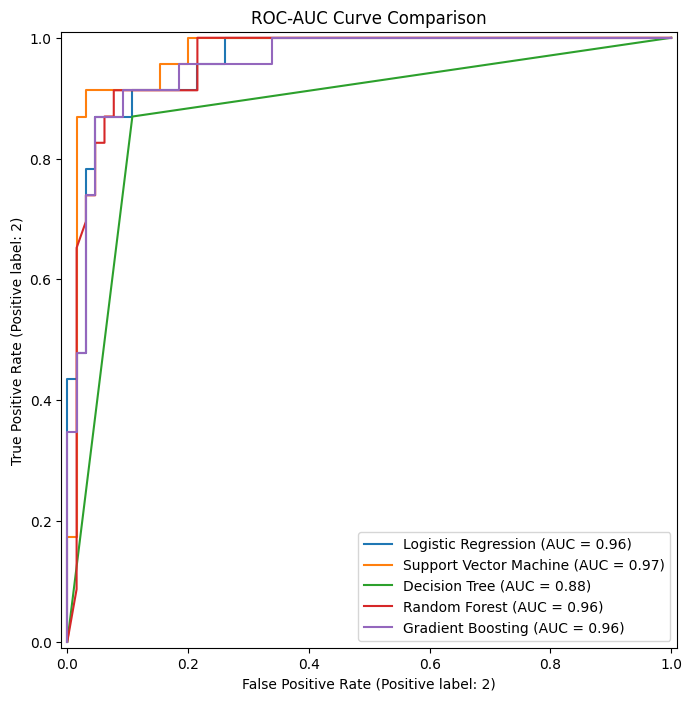

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, RocCurveDisplay
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X_cls_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X_cls = df[X_cls_features] # Features for classification
y_cls = df['Channel'] # Target for classification

# Split the data into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cls)
X_test_scaled = scaler.transform(X_test_cls)

# Predicy Models
models ={
    "Logistic Regression":LogisticRegression(solver='liblinear'),
    "Support Vector Machine":SVC(probability=True, random_state=42),
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42)
}
results = {}

# Prepare figure and axes for ROC curves outside the loop
plt.figure(figsize=(10, 8))
ax = plt.gca()

for name, model in models.items():
    print(f"Training {name}...")

    model.fit(X_train_scaled, y_train_cls)
    y_pred = model.predict(X_test_scaled)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test_cls, y_prob)
        RocCurveDisplay.from_estimator(
            model, X_test_scaled, y_test_cls, name=name, ax=ax
        )
    else:
        roc_auc = None

    results[name] = {
        "Accuracy": accuracy_score(y_test_cls, y_pred),
        "Precision": precision_score(y_test_cls, y_pred, average="weighted"),
        "Recall": recall_score(y_test_cls, y_pred, average="weighted"),
        "F1-Score": f1_score(y_test_cls, y_pred, average="weighted"),
        "ROC-AUC": roc_auc
    }

    print(results[name])

plt.title("ROC-AUC Curve Comparison")
plt.show()

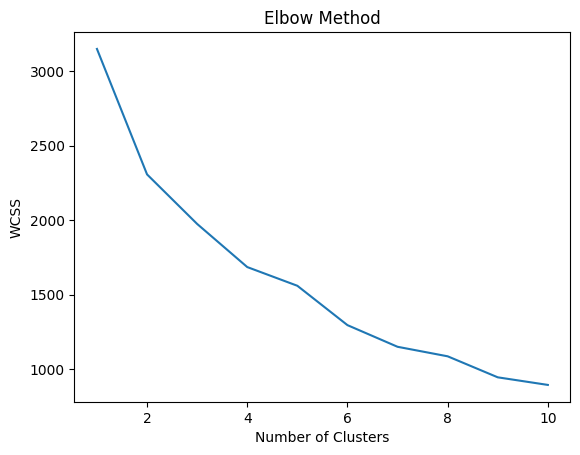

Silhouette Score: 0.26947679272221436


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_train)
df['Cluster'] = pd.Series(clusters, index=X_train.index)

score = silhouette_score(X_train, clusters)
print(f'Silhouette Score: {score}')

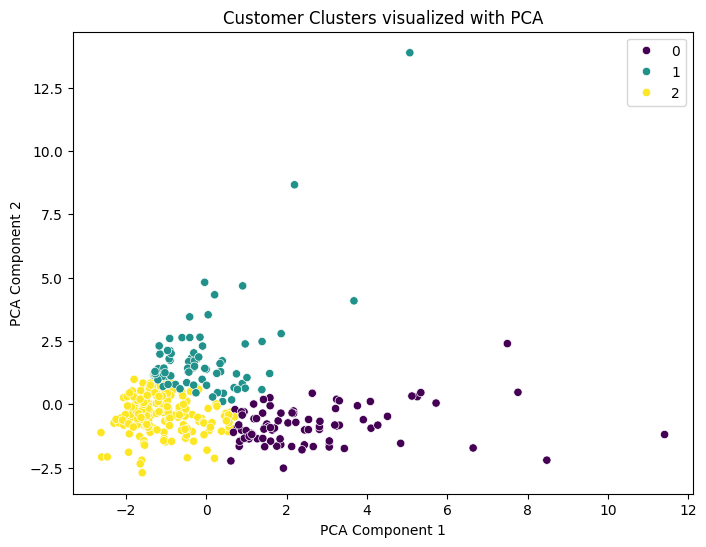

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Clusters visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()